In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

def check_condition(condition, x):
    if isinstance(condition, str):
        # Vérifier si la condition commence par '<'
        if condition.startswith("<"):
            limit = int(condition[1:])  # Extraire la valeur après "<"
            return x < limit  # Retourne True si x est inférieur à la limite
        # Vérifier si la condition commence par '>'
        elif condition.startswith(">"):
            limit = int(condition[1:])  # Extraire la valeur après ">"
            return x > limit  # Retourne True si x est supérieur à la limite
        # Vérifier si la condition est de la forme "[min, max]"
        elif condition[0] == "[" and condition[-1] == "]":
            bounds = condition[1:-1].split(",")  # Séparer par la virgule
            lower = int(bounds[0].strip())  # Extraire et parser le premier nombre
            upper = int(bounds[1].strip())  # Extraire et parser le deuxième nombre
            return lower <= x <= upper  # Retourne True si x est dans l'intervalle
        else:
            raise ValueError("Format de chaîne invalide")
    elif isinstance(condition, (int, float)):  # Si la condition est un int ou float
        return x == condition  # Comparer directement x avec la condition
    else:
        raise ValueError("Condition doit être une chaîne de caractères ou un nombre (int ou float)")


def extract_triples(date, nom, mup=None, T=None, Taille=None):
    triples = {}  # Utiliser un dictionnaire pour stocker les résultats
    
    # Parcourir les fichiers dans le répertoire spécifié par 'date'
    for filename in os.listdir(date):
        # Vérifier si le nom du fichier correspond à un format attendu
        match = re.match(rf"{re.escape(nom)}_([-]?\d+\.\d+)_([-]?\d+\.\d+)_([-]?\d+\.\d+)\.npz", filename)
        if match:
            file_mup = float(match.group(1))    # Extraire mup et convertir en float
            file_T = float(match.group(2))      # Extraire T et convertir en float
            file_Taille = float(match.group(3)) # Extraire Taille et convertir en float                
            # Vérifier si les valeurs correspondent aux critères spécifiés
            if (mup is None or check_condition(mup, file_mup)) and \
               (T is None or check_condition(T, file_T)) and \
               (Taille is None or check_condition(Taille, file_Taille)):
                triples[(file_mup, file_T, file_Taille)] = 1

    return triples

def extract_triples(date, nom, params):
    triples = {}  # Utiliser un dictionnaire pour stocker les résultats

    # Parcourir les fichiers dans le répertoire spécifié par 'date'
    for filename in os.listdir(date):
        # Créer l'expression régulière pour vérifier le format du nom de fichier
        pattern = re.escape(nom)
        for param in params:
            pattern += "_([-]?\d+\.\d+)"  # Ajouter une partie pour chaque paramètre
        pattern += r"\.npz"  # Extension .npz

        # Vérifier si le fichier correspond à l'expression régulière
        match = re.match(pattern, filename)
        if match:
            condition = True
            tuple_values = []  # Liste pour stocker les paramètres extraits
            for i, param in enumerate(params):
                param_value = float(match.group(i+1))  # Convertir en float
                # Vérifier la condition
                condition = condition and (param is None or check_condition(param, param_value))
                if not condition:
                    break
                else:
                    tuple_values.append(param_value)
            
            # Si toutes les conditions sont satisfaites, ajouter le triplet au dictionnaire
            if condition:
                triples[tuple(tuple_values)] = 1  # Ajouter le tuple en tant que clé

    return triples


def corresp(dossier ,  nom , triple , exp = '.npz'):
    # Demander à l'utilisateur de saisir une série de lettres
    #entree = input("Entrez une série de lettres : ").lower()
    index_last_underscore = nom.rfind('_')
    #mu , T , Taille = triple

    #entree = f"{nom}_{mu:.3f}_{T:.3f}_{Taille:.3f}.npz"
    entree = f"{nom}"
    #entree = f"rho_{nom[:index_last_underscore]}_discr_moy_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}"
    print (entree)
    
     # Lister les fichiers .mat dans le répertoire spécifié
    fichiers = [f for f in os.listdir(dossier) if (f.endswith(exp) and entree.lower() in f.lower()) ]
    #fichiers = [f for f in os.listdir(dossier) if (f.endswith(exp) and entree in f) ]


    if not fichiers:
        print(f"Aucun fichier {exp} trouvé dans le répertoire.")
        return
    
    if fichiers:
        print("Les éléments qui correspondent à votre entrée sont :")
        for item in fichiers:
            print(item)
    else:
        print(f"Aucune correspondance trouvée pour '{entree}'.")

def Listes_param(date, nom, params):
    # Extraction des triples via la fonction extract_triples
    triples = extract_triples(date, nom, params)
    
    # Liste des clés de triples
    liste_triples = list(triples.keys())
    
    # Dictionnaire pour stocker les listes de chaque paramètre
    liste_param_dict = {i: [] for i in range(len(params))}

    # Parcours de chaque triple pour remplir les listes de paramètres
    for tuple in liste_triples:
        for i, param in enumerate(params):
            if tuple[i] not in liste_param_dict[i]:
                liste_param_dict[i].append(tuple[i])

    # Récupérer les listes sous forme de liste de listes
    Listes = [sorted(liste_param_dict[i]) for i in range(len(params))]

    return Listes
    

In [3]:
date = '2025-06-25'
nom = "inv-A"

mu = 27.137 #None
T = None
Taille = None
theta_max =  None
npts = None

params = [mu, T, Taille,theta_max , npts]

# Extraction des triples possibles
triples = extract_triples(date, nom, params)
print("Triples key possibles:", triples.keys())

triple = list(triples.keys())[0]

corresp(date ,  nom  , triple , exp = '.npz')

Triples key possibles: dict_keys([(27.137, 59.839, 100.0, 8.363, 84.0)])
inv-A
Les éléments qui correspondent à votre entrée sont :
inv-A_23.842_7.240_100.000_3.874_39.000.npz
inv-A_26.720_116.584_100.000_10.715_107.000.npz
inv-A_24.778_145.610_100.000_11.499_115.000.npz
inv-A_24.426_19.689_100.000_5.007_50.000.npz
inv-A_25.251_30.713_100.000_6.011_60.000.npz
inv-A_23.899_9.043_100.000_4.126_41.000.npz
inv-A_23.805_5.797_100.000_3.622_36.000.npz
inv-A_24.584_22.004_100.000_5.133_51.000.npz
inv-A_24.039_12.622_100.000_4.504_45.000.npz
inv-A_24.995_27.482_100.000_5.619_56.000.npz
inv-A_23.868_8.091_100.000_4.000_40.000.npz
inv-A_24.773_24.591_100.000_5.259_53.000.npz
inv-A_23.983_11.294_100.000_4.378_44.000.npz
inv-A_25.540_34.325_100.000_6.403_64.000.npz
inv-A_25.927_130.291_100.000_11.107_111.000.npz
inv-A_27.500_93.344_100.000_9.931_99.000.npz
inv-A_23.822_6.478_100.000_3.748_37.000.npz
inv-A_27.376_66.874_100.000_8.755_88.000.npz
inv-A_24.298_17.618_100.000_4.881_49.000.npz
inv-A_27.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_heatmap_with_cuts(A, x ,  cut_row_index=None, cut_column_index=None):
    """
    Affiche une heatmap de la matrice A avec des coupes dynamiques en ligne et colonne,
    ainsi que des diagonales et antidiagonales mises en évidence.
    
    Paramètres :
        - A : np.array, la matrice à afficher.
        - cut_row_index : int, indice de la ligne à couper (par défaut au milieu).
        - cut_column_index : int, indice de la colonne à couper (par défaut à 90).
    """
    # Normalisation (similaire à `normalisation = 0.5` en Julia)
    normalisation = A.shape[0]/(3* np.max(np.abs(A) ))*0.5 

    if cut_row_index is None:
        cut_row_index = A.shape[0] // 2  # Coupe au milieu si non spécifié
    if cut_column_index is None:
        cut_column_index = A.shape[1] // 2  # Coupe au milieu si non spécifié

    # Création de la heatmap
    plt.figure(figsize=(10, 10))
    plt.imshow(A, cmap='inferno', interpolation='nearest', origin='lower')
    plt.title(r"Heatmap of $A^{-1}$" , fontsize=20)
    plt.xlabel(r"$\theta ~(\mu m/ms)$" , fontsize=20)
    plt.ylabel(r"$\theta ~(\mu m/ms)$" , fontsize=20)
    plt.colorbar()

    # Coupe horizontale
    plt.plot(A[cut_row_index, :] * normalisation + cut_row_index, label="Cut row", color='white', linewidth=2)
    plt.plot(np.ones(A.shape[0]) * cut_row_index, color='white', linestyle=':', linewidth=0.1)

    # Coupe verticale
    plt.plot(A[:, cut_column_index]* normalisation + cut_column_index , np.arange(0, A.shape[0]),  label="Cut column", color='white', linewidth=2)
    plt.plot(np.ones(A.shape[0]) * cut_column_index, np.arange(0, A.shape[0]),  color='white', linestyle=':', linewidth=0.1)

    # Fonction de rotation autour du point (x0, y0)
    def rot_x(x, y, x0, y0, theta):
        return x0 + (x - x0) * np.cos(theta) / np.abs(np.cos(theta)) - (y - y0) * np.sin(theta) / np.abs(np.cos(theta))

    def rot_y(x, y, x0, y0, theta):
        return y0 + (x - x0) * np.sin(theta) / np.abs(np.sin(theta)) + (y - y0) * np.cos(theta) / np.abs(np.sin(theta))

    # Rotation de la diagonale
    theta = np.pi / 4  # 45° en radians
    rotated_x = [rot_x(i, A[i, i] * normalisation, 0, 0, theta) for i in range(A.shape[0])]
    rotated_y = [rot_y(i, A[i, i] * normalisation, 0, 0, theta) for i in range(A.shape[0])]
    plt.plot(rotated_x, rotated_y, label="Diagonal", color='white', linewidth=2)

    rotated_x = [rot_x(i, 0, 0, 0, theta) for i in range(A.shape[0])]
    rotated_y = [rot_y(i, 0, 0, 0, theta) for i in range(A.shape[1])]
    plt.plot(rotated_x, rotated_y, color='white', linestyle=':', linewidth=0.1)

    # Rotation de l'antidiagonale
    theta = -np.pi / 4  # 135° en radians
    rotated_x = [rot_x(i, A[i, A.shape[1] - i - 1] * normalisation, A.shape[0]-1, 0, theta) for i in range(A.shape[0])]
    rotated_y = [rot_y(i, A[i, A.shape[1] - i - 1] * normalisation, A.shape[1]-1, 0, theta) for i in range(A.shape[0])]
    plt.plot(rotated_x, rotated_y, label="Antidiagonal", color='white', linewidth=2)

    # Lignes en pointillés pour l'antidiagonale
    rotated_x = [rot_x(i, 0, A.shape[0]-1, 0, theta) for i in range(A.shape[0])]
    rotated_y = [rot_y(i, 0, A.shape[1]-1, 0, theta) for i in range(A.shape[1])]
    plt.plot(rotated_x, rotated_y, color='white', linestyle=':', linewidth=0.1)
    
    #plt.xticks(np.arange(0, A.shape[0], 1), labels=x)
    plt.xticks([0 , A.shape[0]-1], labels=[format(x[0], '.2f'), format(x[-1], '.2f')]  , fontsize=20)
    plt.yticks([0 , A.shape[0]-1], labels=[format(x[0], '.2f'), format(x[-1], '.2f')] , fontsize=20)
    
    plt.xlim(0, A.shape[0])
    plt.ylim(0, A.shape[0])
    # Affichage du graphique
    #plt.legend( fontsize=20)
    plt.savefig("fluctu.png")
    plt.show()


Triples key possibles: dict_keys([(27.137, 59.839, 100.0, 8.363, 84.0)])
[27.137]
[59.839]
[100.0]
[8.363]
[84.0]
Erreur : fichier introuvable - [Errno 2] No such file or directory: '2025-06-25/A1_27.137_59.839_100.000_8.363_84.000.npz'


/tmp/ipykernel_8851/683440362.py:170: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


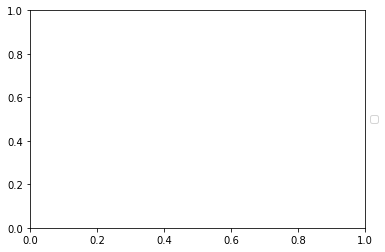

In [6]:
date = '2025-06-25'

nom = "inv-A"
mu = 27.137#None 
T =  None
Taille = None
theta_max =  None
npts = None
 

params = [mu, T, Taille,theta_max , npts]

# Extraction des triples possibles
triples = extract_triples(date, nom, params)
print("Triples key possibles:", triples.keys())

triple = list(triples.keys())[0]
mu , T , Taille , theta_max , npts = triple

Listes = Listes_param(date, nom, params)

for liste in Listes:
    print(liste)

#def plot_compare(Listes , current_index = 0):
#    if current_index == len(Listes) :
#        
#        non = "inv-A"
#        
#        file = f"{date}/{nom}"
#        for i in range(len(Listes)):
#            file += f"_{globals()[f"param_{i}"]:.3f}"
#        file +=  ".npz"
#        A = np.load(file)
#
#        file = f"{date}/{nom}"
#        for i in range(3 , len(Listes)):
#            file += f"_{globals()[f'param_{i}']:.3f}"
#        file += ".npz"
#        theta_discr = np.load(file)
#
#        label = f"$\theta_{{max}}$ = {globals()[f"param_{3}"]:.3f} , $\#$ = {globals()[f"param_{4}"]:.3f} "
#        plt.plot(theta_discr , [ A[i, i] for i in range(A.shape[1]) ] , label= label) 
#
#    for globals()[f"h_{current_index}"] , globals()[f"param_{current_index}"] in enumerate(Listes[current_index]):
#        plot_compare(Listes , current_index + 1)
        
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
from scipy.linalg import norm

def print_norme_remativ(A, B):
    print(f"Norme Frobenius : {norm(A-B, 'fro') / norm(A, 'fro')}")
    print(f"Norme L1 : {norm(A-B, 1) / norm(A, 1)}")
    #print(f"Norme L2 : {norm(A-B, 2) / norm(A, 2)}")
    print(f"Norme de l'infini : {norm(A-B, np.inf) / norm(A, np.inf)}")


def plot_compare(Listes, current_index=0, params=None, date=''):
    if params is None:
        params = {}

    # Base case: when we've processed all the recursive levels
    if current_index == len(Listes):
        # Construct file names based on the parameters and current state

        def generate_filename(nom):
            """
            Génère un nom de fichier basé sur le paramètre nom.
            
            :param nom: str, peut être "inv-A", "inv-A-approx" ou "theta_discr"
            :param date: str, date utilisée comme préfixe
            :param Listes: list, liste des paramètres
            :param params: dict, dictionnaire contenant les valeurs des paramètres
            :return: str, chemin du fichier généré
            """
            if nom != "theta_discr":
                filename = f"{date}/{nom}"
                for i in range(len(Listes)):
                    filename += f"_{params.get(f'param_{i}', 0):.3f}"
                filename += ".npz"
            
            elif nom == "theta_discr":
                filename = f"{date}/theta_discr"
                for i in range(3, len(Listes)):
                    filename += f"_{params.get(f'param_{i}', 0):.3f}"
                filename += ".npz"
            
            else:
                raise ValueError("Nom non reconnu. Utilisez 'inv-A', 'inv-A-approx' ou 'theta_discr'.")
            
            return filename

        try:
            # Load the data from the files
            #inv_A1 = np.load(generate_filename("inv-A1"))
            A1 = np.load(generate_filename("A1"))
            A2 = np.load(generate_filename("A2"))
            A3 = np.load(generate_filename("A3"))
            inv_A = np.load(generate_filename("inv-A"))
            #A_approx = np.load(generate_filename("inv-A-approx"))
            #A_approx_ordre = np.load(generate_filename("inv-A-approx-ordre"))
            theta_discr = np.load(generate_filename("theta_discr"))
            #F = np.load(generate_filename("F"))

            plot_heatmap_with_cuts(inv_A, theta_discr ,  cut_row_index=300, cut_column_index=500)

            # Plotting the diagonal of A against theta_discr
            label = f"$\\theta_{{max}}$ = {params.get('param_3', 0):.3f} , $\#$ = {params.get('param_4', 0):.3f} "
            label = f"$\mu$ = {params.get('param_0', 0):.3f} $nK$, $T$ = {params.get('param_1', 0):.3f} $nK$, $\ell$ = {params.get('param_2', 0):.3f} $\mu m$, $\\theta_{{max}}$ = {params.get('param_3', 0):.3f} $\\mu m/ms$, $\#$ = {params.get('param_4', 0):.3f} "
            #plt.plot(theta_discr, [inv_A[i, i] for i in range(inv_A.shape[1])], label=label)

            #label = f"inv $\\theta_{{max}}$ = {params.get('param_3', 0):.3f} , $\#$ = {params.get('param_4', 0):.3f} "
            #plt.plot(theta_discr, [A_approx[i, i] for i in range(A_approx.shape[1])], label=label)
            #plt.plot(theta_discr, [A_approx[i, i] for i in range(A_approx.shape[1])], label=label)

            #plot_heatmap_with_cuts(F)

            print(label)
            print(" F et  (inv_A - inv_A1) ")
            plot_heatmap_with_cuts(F - (inv_A - inv_A1))
            print_norme_remativ(F ,  (inv_A - inv_A1)) 
            
            #plot_heatmap_with_cuts(F -  (-(inv_A1@(A2+A3))@inv_A1))
            #print_norme_remativ(F, -(inv_A1@(A2+A3))@inv_A1)

            plot_heatmap_with_cuts(F -  (A_approx_ordre-inv_A1))
            print_norme_remativ(F, A_approx_ordre-inv_A1)

            #plot_heatmap_with_cuts(A_approx -  A_approx_ordre)
            #print_norme_remativ(A_approx, A_approx_ordre)
            
            #plot_heatmap_with_cuts(inv_A1)
            #plot_heatmap_with_cuts(F)
           # plot_heatmap_with_cuts(F-(- (inv_A1*(A2+A3))*inv_A1))

            
                  
            print("ordre '1' , 10 ")
            print_norme_remativ(A_approx, A_approx_ordre)
            print("ordre '1' , 1 ")
            print_norme_remativ(A_approx, inv_A1 -(inv_A1@(A2+A3))@inv_A1)
            print("ordre '0' , 0 ")
            print_norme_remativ(inv_A1, inv_A1)
            print(" inv A   ordre ")
            print_norme_remativ(inv_A, A_approx_ordre)

        except FileNotFoundError as e:
            print(f"Erreur : fichier introuvable - {e}")
        except ValueError as e:
            print(f"Erreur de chargement des données : {e}")
        except Exception as e:
            print(f"Une erreur inattendue s'est produite : {e}")

        return  # Exit recursion once we've done all the plotting

    # Recursive case: iterate over the values in Listes[current_index]
    for h_value in Listes[current_index]:
        params[f'param_{current_index}'] = h_value  # Update parameter dictionary
        plot_compare(Listes, current_index + 1, params, date)

# Example usage:
# plot_compare(Listes, current_index=0, params={'param_0': 1.0, 'param_1': 2.0}, date='2025-02-24', nom='experiment')



plot_compare(Listes, current_index=0, params=None, date=date)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

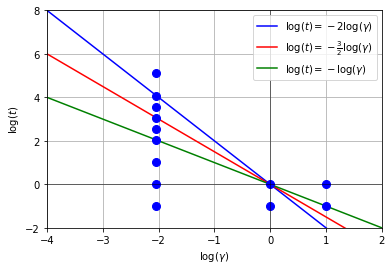

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Définir les équations des droites
def line_1(x):
    return -2 * x  

def line_2(x):
    return -3/2 * x  

def line_3(x):
    return -x  

# Créer un ensemble de valeurs pour t
x_values = np.linspace(-5, 5, 400)

# Calculer les valeurs correspondantes de gamma (y)
y_1 = line_1(x_values)
y_2 = line_2(x_values)
y_3 = line_3(x_values)

# Tracer les droites
plt.plot(x_values, y_1, label=r"$\log(t) = -2\log(\gamma)$", color='b')  # Première droite
plt.plot(x_values, y_2, label=r"$\log(t) = -\frac{3}{2}\log(\gamma)$", color='r')  # Deuxième droite
plt.plot(x_values, y_3, label=r"$\log(t) = -\log(\gamma)$", color='g')  # Troisième droite

# Liste des points
gamma = -2.04
Points = [ (0, 0) , (1,0 ) , (1,0.5*gamma ) , (0 ,0.5*gamma ) ,  (gamma,0.5*gamma) , (gamma,0) ,(gamma,-0.5*gamma), (gamma,-gamma) , (gamma,(-1 -3/2)/2*gamma) , (gamma,-3/2*gamma) , (gamma,(-3/2-2)/2*gamma) , (gamma,-2*gamma), (gamma,-2.5*gamma)   ]

# Tracer les points
for point in Points:
    plt.plot([point[0]], [point[1]], color='blue', marker='o', markersize=8)

# Ajouter des étiquettes et un titre
#plt.title("Graphique des droites et de la norme infinie $\|(\gamma, t)\|_\infty = 1$")
plt.xlabel(r"$\log(\gamma)$")
plt.ylabel(r"$\log(t)$")
plt.legend()

# Afficher le graphique
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)  # Axe horizontal
plt.axvline(0, color='black',linewidth=0.5)  # Axe vertical

# Définir les limites des axes
plt.xlim([-4, 2])  # Limite de l'axe des abscisses
plt.ylim([-2, 8])  # Limite de l'axe des ordonnées (ajustable selon tes besoins)

# Ajouter une grille et afficher le graphique
plt.grid(True)

plt.show()


In [8]:
import numpy as np

# Définir les constantes
hbar = 1.05457182e-25   # um^2.kg/ms
mass =  1.44e-25        # kg (masse du Rubidium 87)
kB = 1.380649e-26       # um^2.ms^-2.kg.nK^{-1}
a3D = 5.3e-3            # um
om_perp = 2 * np.pi * 5 # 2.56  # kHz (fréquence transversale)

# Calculer les constantes dérivées
g = 2 * hbar * a3D * om_perp        # force de répulsion effective 1D
c = mass / hbar**2 * g              # um^{-1}
gbar = g / hbar                     # um.ms^{-1}

# Afficher les résultats
print(f"g = {g} um.ms^-1")
print(f"c = {c} um^-1")
print(f"gbar = {gbar} um.ms^-1")


g = 3.511817187338507e-26 um.ms^-1
c = 0.4547179182579959 um^-1
gbar = 0.33300882128051806 um.ms^-1


In [9]:
nom = "inv-A"

print("date =" , date)
print("nom =" , nom) 
print("mu =" , mu) 
print("T  =" , T) 
print("Taille =", Taille)
print("theta_max =", theta_max)
print("npts =", npts)

A = np.load(f"{date}/{nom}_{mu:.3f}_{T:.3f}_{Taille:.3f}_{theta_max:.3f}_{npts:.3f}.npz") 
nom = "inv-A-approx"
print("nom =" , nom)

A_appox = np.load(f"{date}/{nom}_{mu:.3f}_{T:.3f}_{Taille:.3f}_{theta_max:.3f}_{npts:.3f}.npz")

A_1 = A_appox 

date = 2025-06-25
nom = inv-A
mu = 27.137
T  = 59.839
Taille = 100.0
theta_max = 8.363
npts = 84.0
nom = inv-A-approx


FileNotFoundError: [Errno 2] No such file or directory: '2025-06-25/inv-A-approx_27.137_59.839_100.000_8.363_84.000.npz'

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Charger un exemple de matrice (en remplacement de `A` dans le code Julia)
#A = np.random.rand(10, 10)  # Exemple de matrice 10x10

# Normalisation (similaire à `normalisation = 0.5` en Julia)
normalisation = 0.5 

# Création de la heatmap
plt.figure(figsize=(20, 20))
plt.imshow(A_1, cmap='inferno', interpolation='nearest', origin='lower')
plt.title("Heatmap of A")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\theta$")
plt.colorbar()

# Sélectionner dynamiquement une ligne à couper (coupe horizontale)
cut_row_index = int(A_1.shape[1]/2)  # Exemple de ligne à couper
plt.plot(A_1[cut_row_index, :] * normalisation + cut_row_index, label="Cut row", color='white', linewidth=2)
plt.plot(np.ones(A_1.shape[1]) * cut_row_index, color='red', linestyle=':', linewidth=1)

# Sélectionner dynamiquement une colonne à couper (coupe verticale)
cut_column_index = 90  # Exemple de colonne à couper
plt.plot(A_1[:, cut_column_index] * normalisation + cut_column_index, label="Cut column", color='white', linewidth=2)
plt.plot(np.ones(A_1.shape[0]) * cut_column_index, color='red', linestyle=':', linewidth=1)

# Fonction de rotation autour du point (x0, y0)
def rot_x(x, y, x0, y0, theta):
    return x0 + (x - x0) * np.cos(theta) / np.abs(np.cos(theta)) - (y - y0) * np.sin(theta) / np.abs(np.cos(theta))

def rot_y(x, y, x0, y0, theta):
    return y0 + (x - x0) * np.sin(theta) / np.abs(np.sin(theta)) + (y - y0) * np.cos(theta) / np.abs(np.sin(theta))

# Rotation de la diagonale
theta = np.pi / 4  # 45° en radians
rotated_x = [rot_x(i, A_1[i, i] * normalisation , 0, 0, theta) for i in range(A_1.shape[0])]
rotated_y = [rot_y(i, A_1[i, i] * normalisation , 0, 0, theta) for i in range(A_1.shape[0])]
plt.plot(rotated_x, rotated_y, label="Diagonal", color='red', linewidth=2)
rotated_x = [rot_x(i, 0, 0, 0, theta) for i in range(A_1.shape[0])]
rotated_y = [rot_y(i, 0, 0, 0, theta) for i in range(A_1.shape[1])]
plt.plot(rotated_x, rotated_y, color='red', linestyle=':', linewidth=1)

# Diagonale à 135°
theta = -np.pi / 4  # 135° en radians
rotated_x = [rot_x(i, A_1[i, A_1.shape[1] - i - 1] * normalisation , A_1.shape[0]-1, 0, theta) for i in range(A_1.shape[0])]
rotated_y = [rot_y(i, A_1[i, A_1.shape[1] - i - 1] * normalisation , A_1.shape[1]-1, 0, theta) for i in range(A_1.shape[0])]
plt.plot(rotated_x, rotated_y, label="Antidiagonal", color='white', linewidth=2)

# Ajouter des lignes en pointillés pour les diagonales
rotated_x = [rot_x(i, 0,  A_1.shape[0]-1, 0, theta) for i in range(A_1.shape[0])]
rotated_y = [rot_y(i, 0,  A_1.shape[1]-1, 0, theta) for i in range(A_1.shape[1])]
plt.plot(rotated_x, rotated_y, color='red', linestyle=':', linewidth=1)

# Afficher le graphique
plt.legend()
plt.show()


NameError: name 'A_1' is not defined

<Figure size 1440x1440 with 0 Axes>

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plot_graph(Points, Points_r=None):
    # Définir la plage de valeurs pour x
    x_values = np.linspace(-5, 5, 400)

    # Définir les fonctions des droites
    y_1 = -2 * x_values
    y_2 = -1.5 * x_values
    y_3 = -1 * x_values

    # Créer la figure
    plt.figure(figsize=(8, 6))

    # Tracer les droites
    plt.plot(x_values, y_1, label=r"$\log(t) = -2\log(\gamma)$", color="blue", linewidth=2)
    plt.plot(x_values, y_2, label=r"$\log(t) = -\frac{3}{2}\log(\gamma)$", color="red", linewidth=2)
    plt.plot(x_values, y_3, label=r"$\log(t) = -\log(\gamma)$", color="green", linewidth=2)

    # Tracer les points donnés
    print(Points)
    if Points:
        x_pts, y_pts = zip(*Points)
        plt.scatter(x_pts, y_pts, color="blue", s=60, label=None)

    if Points_r:
        x_pts_r, y_pts_r = zip(*Points_r)
        plt.scatter(x_pts_r, y_pts_r, color="red", s=60, label=None)

    # Ajouter des labels et formatage
    plt.xlabel(r"$\log(\gamma)$")
    plt.ylabel(r"$\log(t)$")
    plt.xlim(-4, 2)
    plt.ylim(-2, 8)
    plt.grid(True)
    plt.legend(loc='upper right')

    # Tracer les axes
    plt.axhline(0, color='black', linewidth=1, linestyle='--')
    plt.axvline(0, color='black', linewidth=1, linestyle='--')

    # Afficher le graphique
    plt.tight_layout()
    plt.show()


In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_graph(Points, Points_r=None):
    # Définir la plage de valeurs pour x
    x_values = np.linspace(-5, 5, 400)

    # Définir les fonctions des droites
    y_1 = -2 * x_values
    y_2 = -1.5 * x_values
    y_3 = -1 * x_values

    # Créer la figure
    plt.figure(figsize=(8, 6))

    # Tracer les droites
    plt.plot(x_values, y_1, label=r"$\log(t) = -2\log(\gamma)$", color="blue", linewidth=2)
    plt.plot(x_values, y_2, label=r"$\log(t) = -\frac{3}{2}\log(\gamma)$", color="red", linewidth=2)
    plt.plot(x_values, y_3, label=r"$\log(t) = -\log(\gamma)$", color="green", linewidth=2)

    # Tracer les points donnés
    print(Points)
    if Points:
        x_pts, y_pts = zip(*Points)
        plt.scatter(x_pts, y_pts, color="blue", s=60, label=None)

    if Points_r:
        x_pts_r, y_pts_r = zip(*Points_r)
        plt.scatter(x_pts_r, y_pts_r, color="red", s=60, label=None)

    # Ajouter des labels et formatage
    plt.xlabel(r"$\log(\gamma)$", fontsize=20)
    plt.ylabel(r"$\log(t)$", fontsize=20)
    plt.xlim(-4, 2)
    plt.ylim(-2, 8)
    plt.grid(True)
    plt.legend(loc='upper right', fontsize=20)

    # Tracer les axes
    plt.axhline(0, color='black', linewidth=1, linestyle='--')
    plt.axvline(0, color='black', linewidth=1, linestyle='--')

    # Afficher le graphique
    plt.tight_layout()

    # Enregistrer l'image
    plt.savefig("diagram.png", dpi=300)

    # Afficher le graphique
    plt.show()

In [19]:
import numpy as np

# Fonction pour charger un fichier .npz
def load_npz_data(file_path):
    data = np.load(file_path)
    return data

# Exemple de récupération des fichiers
new_date = "2025-06-25"  # Remplace cette valeur par la date réelle utilisée dans ton code Julia

# Chargement des matrices à partir des fichiers .npz
points_file = f"{new_date}/Points_2.npz"
FLUC_N1_file = f"{new_date}/FLUC_N1_2.npz"
FLUC_N2_file = f"{new_date}/FLUC_N2_2.npz"
FLUC_E_minus_muN1_file = f"{new_date}/FLUC_E_minus_muN1_2.npz"
FLUC_E_minus_muN2_file = f"{new_date}/FLUC_E_minus_muN2_2.npz"

# Charger les fichiers
Points2 = load_npz_data(points_file)
FLUC_N1 = load_npz_data(FLUC_N1_file)
FLUC_N2 = load_npz_data(FLUC_N2_file)
FLUC_E_minus_muN1 = load_npz_data(FLUC_E_minus_muN1_file)
FLUC_E_minus_muN2 = load_npz_data(FLUC_E_minus_muN2_file)

# Extraction des données sous forme de tableau numpy
Points2_array = Points2#['arr_0']  # Accessing the data stored in the 'arr_0' key
FLUC_N1_array = [x[0] for x in FLUC_N1]#['arr_0']
FLUC_N2_array = [x[0] for x in FLUC_N2]#['arr_0']
FLUC_E_minus_muN1_array = [x[0] for x in FLUC_E_minus_muN1]#['arr_0']
FLUC_E_minus_muN2_array = [x[0] for x in FLUC_E_minus_muN2]#['arr_0']

# Affichage des matrices
print("Points2:", Points2_array)
print("FLUC_N1:", FLUC_N1_array)
print("FLUC_N2:", FLUC_N2_array)
print("FLUC_E_minus_muN1:", FLUC_E_minus_muN1_array)
print("FLUC_E_minus_muN2:", FLUC_E_minus_muN2_array)


Points2: [[-1.342       0.7        23.8043555 ]
 [-1.342       1.4        25.11537127]
 [-1.34200001  2.1        24.76011812]]
FLUC_N1: [np.float64(236.89908465189546), np.float64(1274.0920475700502), np.float64(3329.9271880312212)]
FLUC_N2: [np.float64(236.4832424198136), np.float64(1259.3684637234835), np.float64(3575.826400175119)]
FLUC_E_minus_muN1: [np.float64(3.0813267056461386e-49), np.float64(2.9676150733675554e-47), np.float64(1.1296288498408392e-45)]
FLUC_E_minus_muN2: [np.float64(8.250601231592447e-49), np.float64(2.7936076732588255e-47), np.float64(1.1815380161193431e-45)]


[(np.float64(-1.3420000003918462), np.float64(0.6999999999999998)), (np.float64(-1.342000003003157), np.float64(1.3999999999999997)), (np.float64(-1.3420000081555434), np.float64(2.1))]


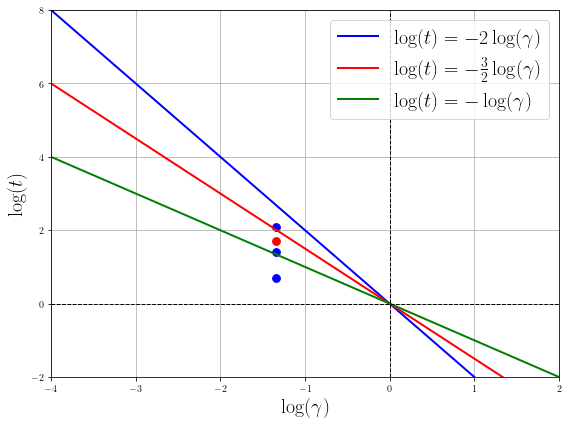

59.83892533937247


In [20]:
#Points = [(-2, 2), (0, 0), (1, -1)]
#Points_r = [(-1, 3), (0.5, -0.5)]
# Définir les constantes
hbar = 1.05457182e-25   # um^2.kg/ms
mass =  1.44e-25        # kg (mass of Rubidium 87)
kB = 1.380649e-26       # um^2.ms^-2.kg.nK^{-1}
a3D = 5.3e-3            # um
om_perp = 2 * np.pi * 5 # 2.56  # kHz (transverse frequency)
# Calculer les constantes dérivées
g = 2 * hbar * a3D * om_perp        # effective 1d repulsion strength
c = mass / hbar**2 * g              # um^{-1}
gbar = g / hbar 

plot_graph([(x, y) for (x, y , _ ) in Points2_array] , [(-1.342,1.7137931)])
def f_T(t, gb):
    return t * mass * gb**2 / kB
T = f_T(10**1.7137931, gbar)
print(T)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from PIL import Image
import os

rcParams['text.usetex'] = True  # Pour les labels en LaTeX

def plot_and_save_graphs(new_date, Points, FLUC_N1, FLUC_N2, FLUC_E_minus_muN1, FLUC_E_minus_muN2, 
                         indice_x, indice_const, min_val=2, max_val=6):

    # Conversion des données en numpy array si ce n'est déjà fait
    Points = np.array(Points)
    FLUC_N1 = np.array(FLUC_N1)
    FLUC_N2 = np.array(FLUC_N2)
    FLUC_E_minus_muN1 = np.array(FLUC_E_minus_muN1)
    FLUC_E_minus_muN2 = np.array(FLUC_E_minus_muN2)

    if indice_x == 1:
        X = Points[:, 0]
        xlabel = r"$\log \gamma$"
    elif indice_x == 2:
        X = Points[:, 1]
        xlabel = r"$\log t$"
    else:
        X = Points[:, 2]
        xlabel = r"$\mu$ (nK)"

    # Application du masque pour filtrer les données
    mask = (X >= min_val) & (X <= max_val)

    X_filtered = X[mask]
    FLUC_N1_filtered = FLUC_N1[mask]
    FLUC_N2_filtered = FLUC_N2[mask]
    FLUC_E_minus_muN1_filtered = FLUC_E_minus_muN1[mask]
    FLUC_E_minus_muN2_filtered = FLUC_E_minus_muN2[mask]

    # Construction des titres
    if indice_const == 1:
        log_gamma = Points[0][0]
        titre1 = rf"$\langle N^2 \rangle$, $\log(\gamma) = {log_gamma:.3f}$"
        titre2 = rf"$\langle (E - \mu N)^2 \rangle$, $\log(\gamma) = {log_gamma:.3f}$"
        titre3 = rf"$\frac{{\langle N^2_1 \rangle - \langle N^2_2 \rangle}}{{\langle N^2_1 \rangle}} \times 100$, $\log(\gamma) = {log_gamma:.3f}$"
        titre4 = rf"$\frac{{\langle (E_1 - \mu N_1)^2 \rangle - \langle (E_2 - \mu N_2)^2 \rangle}}{{\langle (E_1 - \mu N_1)^2 \rangle}} \times 100$, $\log(\gamma) = {log_gamma:.3f}$"
        filename = f"{new_date}/fluctuations_plot_log_gamma={log_gamma:.3f}.png"       
        filename_r = f"{new_date}/fluctuations_relativ_plot_log_gamma={log_gamma:.3f}.png"
        filename0 = f"fluctuations_plot_log_gamma={log_gamma:.3f}.png"
        filename_r0 = f"fluctuations_relativ_plot_log_gamma={log_gamma:.3f}.png"
    elif indice_const == 2:
        log_t = Points[0][1]
        titre1 = rf"$\langle N^2 \rangle$, $\log(t) = {log_t:.3f}$"
        titre2 = rf"$\langle (E - \mu N)^2 \rangle$, $\log(t) = {log_t:.3f}$"
        titre3 = rf"$\frac{{\langle N^2_1 \rangle - \langle N^2_2 \rangle}}{{\langle N^2_1 \rangle}} \times 100$, $\log(t) = {log_t:.3f}$"
        titre4 = rf"$\frac{{\langle (E_1 - \mu N_1)^2 \rangle - \langle (E_2 - \mu N_2)^2 \rangle}}{{\langle (E_1 - \mu N_1)^2 \rangle}} \times 100$, $\log(t) = {log_t:.3f}$"
        filename = f"{new_date}/fluctuations_plot_log_t={log_t:.3f}.png"
        filename_r = f"{new_date}/fluctuations_relativ_plot_log_ta={log_t:.3f}.png"
        filename0 = f"fluctuations_plot_log_t={log_t:.3f}.png"
        filename_r0 = f"fluctuations_relativ_plot_log_ta={log_t:.3f}.png"
    else:
        mu = Points[0][2]
        titre1 = rf"$\langle N^2 \rangle$, $\mu = {mu:.3f}$ nK"
        titre2 = rf"$\langle (E - \mu N)^2 \rangle$, $\mu = {mu:.3f}$ nK"
        titre3 = rf"$\frac{{\langle N^2_1 \rangle - \langle N^2_2 \rangle}}{{\langle N^2_1 \rangle}} \times 100$, $\mu = {mu:.3f}$ nK"
        titre4 = rf"$\frac{{\langle (E_1 - \mu N_1)^2 \rangle - \langle (E_2 - \mu N_2)^2 \rangle}}{{\langle (E_1 - \mu N_1)^2 \rangle}} \times 100$, $\mu = {mu:.3f}$ nK"
        filename = f"{new_date}/fluctuations_plot_mu={mu:.3f}.png"
        filename_r = f"{new_date}/fluctuations_relativ_plot_mu={mu:.3f}.png"
        filename0 = f"fluctuations_plot_mu={mu:.3f}.png"
        filename_r0 = f"fluctuations_relativ_plot_mu={mu:.3f}.png"
    # Tracé des graphiques
    fig1, axes = plt.subplots(1, 2, figsize=(10, 4))
    axes[0].plot(X_filtered, FLUC_N1_filtered, 'o-', label=r"$\frac{1}{\beta} \left. \frac{\partial \langle \mathcal{N} \rangle}{\partial \mu} \right|_T$")
    axes[0].plot(X_filtered, FLUC_N2_filtered, 's-', label=r"$\langle (\mathcal{N} - \langle \mathcal{N} \rangle )^2 \rangle$")
    axes[0].set_title(titre1)
    axes[0].set_ylabel(r"Fluctuation de $\mathcal{N}$")
    axes[0].set_xlabel(xlabel)
    axes[0].legend()

    axes[1].plot(X_filtered, FLUC_E_minus_muN1_filtered, 'd-', label=r"$- \left. \frac{\partial \langle \mathcal{E} - \mu \mathcal{N} \rangle}{\partial \beta} \right|_\mu.$")
    axes[1].plot(X_filtered, FLUC_E_minus_muN2_filtered, '^-', label=r"$\left \langle  \left (  (\mathcal{E} - \mu \mathcal{N}  ) -  \langle\mathcal{E} - \mu \mathcal{N} \rangle  \right )^2  \right \rangle$")
    axes[1].set_title(titre2)
    axes[1].set_ylabel(r"Fluctuation de $\mathcal{E} - \mu \mathcal{N} ~ (nK)$ ")
    axes[1].set_xlabel(xlabel)
    axes[1].legend()

    os.makedirs(new_date, exist_ok=True)
    #filename = f"{new_date}/fluctuations_plot_log_gamma={log_gamma:.3f}.png"
    plt.tight_layout()
    plt.savefig(filename)
    plt.savefig(filename0)
    plt.show()
    plt.close(fig1)
    print(f"Graphique sauvegardé sous '{filename}'")

    # Calcul du taux de variation relatif
    mask_N = FLUC_N1_filtered != 0
    mask_E = FLUC_E_minus_muN1_filtered != 0

    relative_N = np.zeros_like(FLUC_N1_filtered)
    relative_E = np.zeros_like(FLUC_E_minus_muN1_filtered)

    relative_N[mask_N] = (FLUC_N1_filtered[mask_N] - FLUC_N2_filtered[mask_N]) / FLUC_N1_filtered[mask_N]
    relative_E[mask_E] = (FLUC_E_minus_muN1_filtered[mask_E] - FLUC_E_minus_muN2_filtered[mask_E]) / FLUC_E_minus_muN1_filtered[mask_E]

    fig2, axes = plt.subplots(1, 2, figsize=(10, 4))
    axes[0].plot(X_filtered, relative_N * 100, 'o-', label="Variation relative N")
    axes[0].set_title(titre3)
    axes[0].set_xlabel(xlabel)
    axes[0].set_ylabel("Variation relative $\mathcal{N}$ Pourcentage $\%$")

    axes[1].plot(X_filtered, relative_E * 100, 'd-', label="Variation relative E")
    axes[1].set_title(titre4)
    axes[1].set_xlabel(xlabel)
    axes[1].set_ylabel(r"Variation relative $\mathcal{E} - \mu \mathcal{N}$ Pourcentage $\%$")

    #filename_r = f"{new_date}/fluctuations_relativ_plot_log_gamma={log_gamma:.3f}.png"
    plt.tight_layout()
    plt.savefig(filename_r)
    plt.savefig(filename_r0)
    plt.show()
    plt.close(fig2)
    print(f"Graphique sauvegardé sous '{filename_r}'")

    # Affichage de l’image (optionnel)
    img = Image.open(filename)
    img.show()
    img_r = Image.open(filename_r)
    img_r.show()


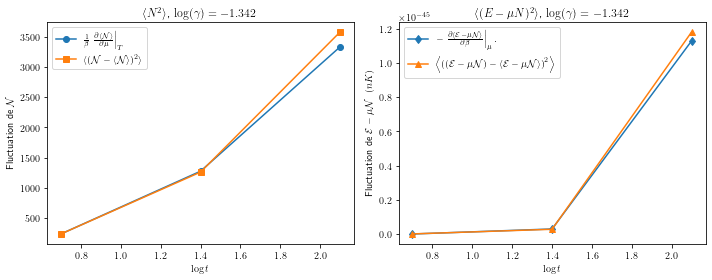

Graphique sauvegardé sous '2025-06-25/fluctuations_plot_log_gamma=-1.342.png'


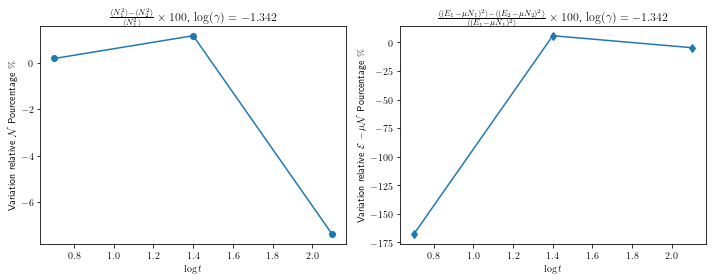

Graphique sauvegardé sous '2025-06-25/fluctuations_relativ_plot_log_gamma=-1.342.png'


Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)
Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)
/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening '/tmp/tmp5x484dc0.PNG'
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening '/tmp/tmp_rpssha6.PNG'


In [22]:
plot_and_save_graphs(new_date, Points2_array, FLUC_N1_array, FLUC_N2_array, FLUC_E_minus_muN1_array, FLUC_E_minus_muN2_array, 
                         indice_x=2, indice_const=1, min_val=0, max_val=6)